## Name : Fawzi abdelnaby elsayed
## Group : One(Mansoura)
## Assignment_4_Day_1

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn.metrics as metrics

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [2]:
data = pd.read_csv("pima-indians-diabetes.csv",header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
import numpy as np

labels=data.iloc[:,8]
features = data.iloc[:,0:8]

X=features
y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

## shallow: 1 hidden, output layer

In [4]:
model = Sequential()
# one hidden layer
model.add(Dense(4, activation='relu', input_shape=(8,),name='hidden1'))
# output layer
model.add(Dense(1, activation='sigmoid',name='output'))

In [5]:
model.layers

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit Model                  
history=model.fit(X_train, y_train,epochs=150, batch_size=32)

Epoch 1/150
20/20 [==============================] - 1s 2ms/step - loss: 22.4920 - accuracy: 0.3697
Epoch 2/150
20/20 [==============================] - 0s 2ms/step - loss: 16.9394 - accuracy: 0.4039
Epoch 3/150
20/20 [==============================] - 0s 2ms/step - loss: 12.8170 - accuracy: 0.4104
Epoch 4/150
20/20 [==============================] - 0s 2ms/step - loss: 10.2127 - accuracy: 0.4283
Epoch 5/150
20/20 [==============================] - 0s 1ms/step - loss: 8.4446 - accuracy: 0.4593
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: 7.2337 - accuracy: 0.4886
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: 6.3223 - accuracy: 0.5228
Epoch 8/150
20/20 [==============================] - 0s 2ms/step - loss: 5.6025 - accuracy: 0.5407
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 5.0143 - accuracy: 0.5717
Epoch 10/150
20/20 [==============================] - 0s 2ms/step - loss: 4.4984 - accuracy: 0.5765
Epoch

In [7]:
_,accurecy_train=model.evaluate(X_train,y_train)
_,accurecy_test=model.evaluate(X_test,y_test)
print("accurecy_train: ", accurecy_train*100)
print("accurecy_test: ", accurecy_test*100)

5/5 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6883
accurecy_train:  67.75244474411011
accurecy_test:  68.83116960525513


### plot accurecy and loss curve

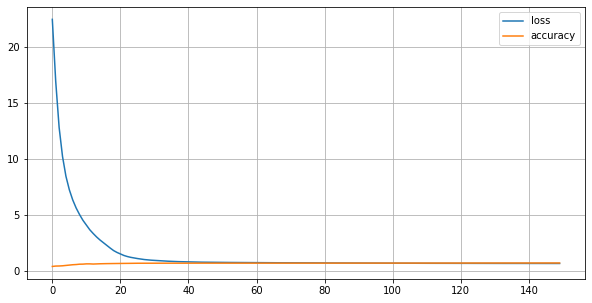

In [8]:
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

### Calculate Accurecy & Confusion Matrix

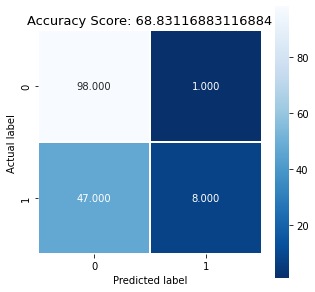

In [10]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
plt.figure(figsize=(5,5))
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(str(accuracy*100))
plt.title(all_sample_title, size = 13);

## Two hidden layers with 12 and 8 nodes respectively

In [11]:
model = Sequential()
# Two hidden layers
model.add(Dense(12, activation='relu', input_shape=(8,),name='hidden1'))
model.add(Dense(8, activation='relu',name='hidden2'))
# output layer
model.add(Dense(1, activation='sigmoid',name='output'))

In [12]:
model.layers

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit Model                   
history=model.fit(X_train, y_train,epochs=150, batch_size=32)

Epoch 1/150
20/20 [==============================] - 0s 2ms/step - loss: 8.2054 - accuracy: 0.4283
Epoch 2/150
20/20 [==============================] - 0s 2ms/step - loss: 4.8019 - accuracy: 0.5277
Epoch 3/150
20/20 [==============================] - 0s 2ms/step - loss: 3.0483 - accuracy: 0.5603
Epoch 4/150
20/20 [==============================] - 0s 2ms/step - loss: 2.1631 - accuracy: 0.5261
Epoch 5/150
20/20 [==============================] - 0s 2ms/step - loss: 1.9085 - accuracy: 0.5391
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: 1.6943 - accuracy: 0.5114
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: 1.5599 - accuracy: 0.5309
Epoch 8/150
20/20 [==============================] - 0s 2ms/step - loss: 1.4402 - accuracy: 0.5342
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 1.3226 - accuracy: 0.5603
Epoch 10/150
20/20 [==============================] - 0s 2ms/step - loss: 1.2727 - accuracy: 0.5212
Epoch 11/

In [14]:
_,accurecy_train=model.evaluate(X_train,y_train)
_,accurecy_test=model.evaluate(X_test,y_test)
print("accurecy_train: ", accurecy_train*100)
print("accurecy_test: ", accurecy_test*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.6818
accurecy_train:  73.94136786460876
accurecy_test:  68.18181872367859


### Plot Accurecy & Lose Curve

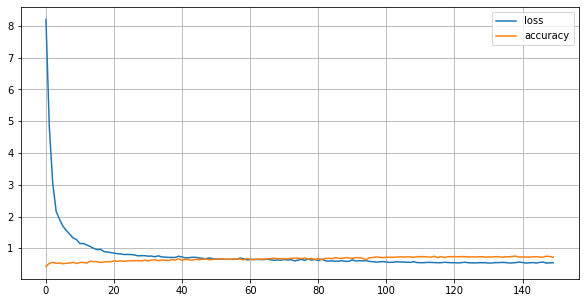

In [15]:
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

### Calculate Accurecy & confusion Matrix

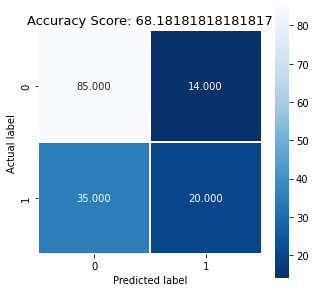

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn.metrics as metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
plt.figure(figsize=(5,5))
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(str(accuracy*100))
plt.title(all_sample_title, size = 13);

## Three hidden layers with 32, 16, 8 nodes respectively

In [17]:
model = Sequential()
# Three hidden layers
model.add(Dense(32, activation='relu', input_shape=(8,),name='hidden1'))
model.add(Dense(16, activation='relu',name='hidden2'))
model.add(Dense(8, activation='relu',name='hidden3'))
# output layer
model.add(Dense(1, activation='sigmoid',name='output'))

In [18]:
model.layers

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit Model                  
history=model.fit(X_train, y_train,epochs=150, batch_size=32)

Epoch 1/150
20/20 [==============================] - 1s 2ms/step - loss: 1.4904 - accuracy: 0.5537
Epoch 2/150
20/20 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.6450
Epoch 3/150
20/20 [==============================] - 0s 2ms/step - loss: 0.7430 - accuracy: 0.6189
Epoch 4/150
20/20 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.6417
Epoch 5/150
20/20 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6352
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6352
Epoch 7/150
20/20 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6661
Epoch 8/150
20/20 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6743
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6417
Epoch 10/150
20/20 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.6678
Epoch 11/

In [20]:
_,accurecy_train=model.evaluate(X_train,y_train)
_,accurecy_test=model.evaluate(X_test,y_test)
print("accurecy_train: ", accurecy_train*100)
print("accurecy_test: ", accurecy_test*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.6262 - accuracy: 0.7273
accurecy_train:  78.50162982940674
accurecy_test:  72.72727489471436


### Plot Accurecy & Lose Curve



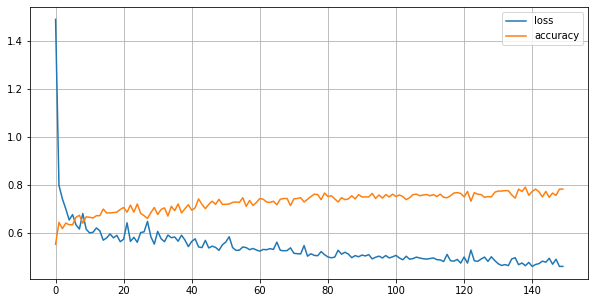

In [21]:
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

### Calculate Accurecy & Confusion Matrix

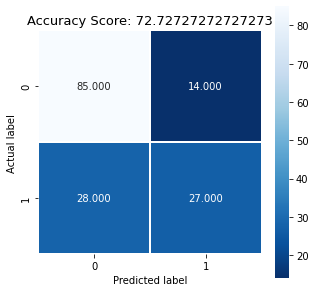

In [22]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
plt.figure(figsize=(5,5))
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(str(accuracy*100))
plt.title(all_sample_title, size = 13);